### 성적데이터 생성

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame(
    {'시간' : [2,4,8,9],
     '성적' : [20,40,80,90] }
)
data

,시간,성적
0,2,20
1,4,40
2,8,80
3,9,90


w와 b를 찾는 방법
- 최소제곱법 : 수학적 공식을 이용한 해석적 방법
- 경사하강법 : w와 b값의 변화에 따른 오차값(MSE)의 기울기를 이용하여 찾는 방법

sklearn의 선형회귀 모델은 최소제곱법이 적용된 모델이다.

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
# 모델 생성 
lr_rg = LinearRegression() # 하이퍼파라미터 값 X

In [12]:
# 학습
lr_rg.fit(data[['시간']],data[['성적']])

LinearRegression()

In [16]:
# 예측
lr_rg.predict([[7]])

C:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.]])

In [22]:
# 가중치(w), 절편(b) 확인
lr_rg.coef_ # 가중치(w)

array([[10.]])

In [26]:
lr_rg.intercept_ # 절편(b)

array([7.10542736e-15])

### 경사하강법(Gradient Descent)
1. 파라미터(w,b) 초기화 : 임의의 값으로
2. 예측 : 현재 w와 b를 사용해서 예측을 수행
3. 오차 계산 : 예측값과 실제값 사이의 오차 계산 > MSE화
4. 비용함수의 기울기 계산 : 오차값이 낮아지는 방향을 찾기 위해서, w와 MSE간의 기울기 값을 계산
5. 파라미터 업데이트 : 기울기와 학습률을 사용하여 업데이트

In [29]:
# 가설함수 정의
# 예측값
def h(w,x):
    return w*x+0

In [31]:
# MSE(평균제곱오차) 구하기 : 손실함수, 비용함수
def cost(data, target, weight): # 특성(시간), 실제값(성적), 가중치
    y_pred = h(weight, data)
    mse = ((target - y_pred)**2).mean()
    return mse

In [49]:
# MSE 값 구하기
cost(data['시간'], data['성적'], 10)

0.0

- w값에 따른 MSE변화율 그려보기

In [53]:
# x축의 범위
w_arr = range(-10,31)

In [59]:
cost_list = [] # 비용함수 MSE를 담아줄 리스트
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)

cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

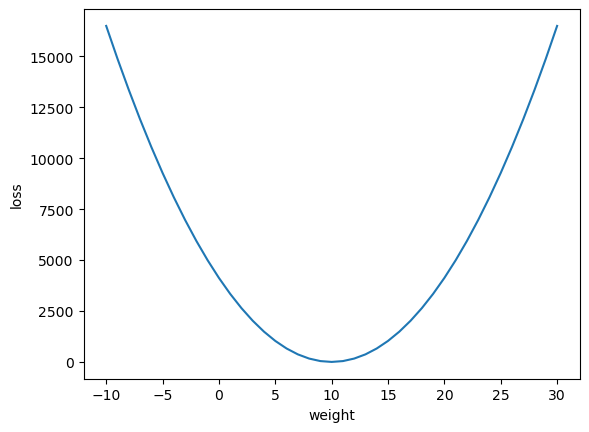

In [61]:
plt.plot(w_arr, cost_list)
plt.xlabel('weight')
plt.ylabel('loss')
plt.show()

In [63]:
# 경사하강법이 적용된 모델
from sklearn.linear_model import SGDRegressor

In [65]:
# 모델 생성
sgd_rg = SGDRegressor(
    eta0 = 0.01, # 학습률 : 기울기의 보폭
    max_iter = 5000, # w값을 업데이트 하는 최대 횟수
    verbose = 1 # 학습 진행 현황 출력
)

In [69]:
sgd_rg.fit(data[['시간']], data[['성적']])

-- Epoch 1
Norm: 9.15, NNZs: 1, Bias: 1.045736, T: 4, Avg. loss: 1039.050060
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 9.67, NNZs: 1, Bias: 1.118003, T: 8, Avg. loss: 5.682015
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 9.78, NNZs: 1, Bias: 1.127245, T: 12, Avg. loss: 0.577591
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 9.83, NNZs: 1, Bias: 1.129270, T: 16, Avg. loss: 0.184112
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.83, NNZs: 1, Bias: 1.125203, T: 20, Avg. loss: 0.138629
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.85, NNZs: 1, Bias: 1.122897, T: 24, Avg. loss: 0.135632
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.84, NNZs: 1, Bias: 1.118129, T: 28, Avg. loss: 0.130334
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.85, NNZs: 1, Bias: 1.115461, T: 32, Avg. loss: 0.131600
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.84, NNZs: 1, Bias: 1.110928, T: 36, Avg. loss: 0.128163
Total training time: 0.00 seconds.
-- Epoch 

C:\Users\a\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=5000, verbose=1)

In [71]:
# 가중치와 절편 확인
sgd_rg.coef_, sgd_rg.intercept_

(array([9.86052386]), array([1.01752125]))

In [81]:
# 성능 확인
sgd_rg.score(data[['시간']],data[['성적']]) # 회귀 평가 지표


0.9997487255395502

### 회귀 평가 지표
- 오차값, 데이터의 분포를 모델이 잘 이해하고 있는가?

### 분류 평가 지표
- 얼마나 잘 맞췄는가?